In [1]:
# Notes & Lecture by Akhona Njeje.
# Date 25 May 2023.
# Topic : Machine Learning & Algorithms.Decision Trees.
# Problem St & Application : Build a Model That predicts if a client will pay back hes/her bank loan.
# More info : LendingClub.com.
# Documentation info : https://en.wikipedia.org/wiki/Scikit-learn & SKLearn Cheat sheet.



# Import frameworks & libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Dataset.

loan = pd.read_csv("loan_data.csv")
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# EDA.
# Description & Information of the dataset.

loan.info()
print("\n")   # Add a line the two(Info & descr).
loan.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB




,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

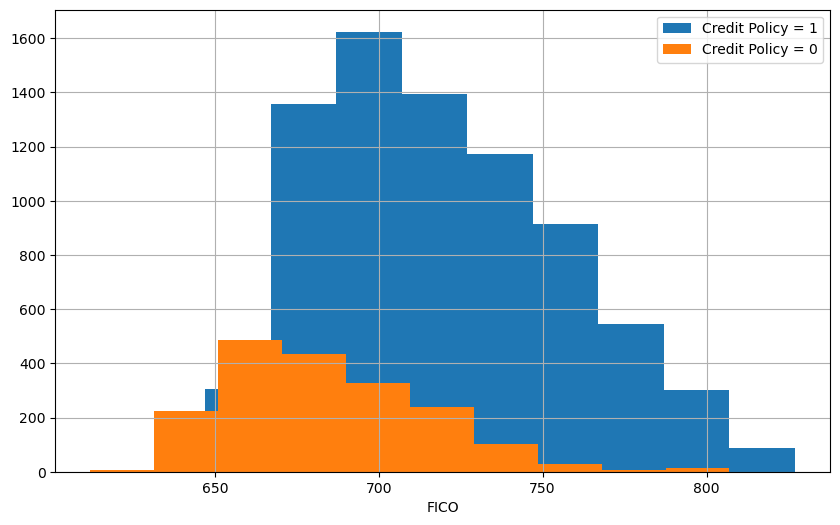

In [8]:
   # Create a histogram on Credit Policy & Fico.
plt.figure(figsize=(10,6))
loan[loan['credit.policy']==1]['fico'].hist(label='Credit Policy = 1')
loan[loan['credit.policy']==0]['fico'].hist(label='Credit Policy = 0')
plt.legend()
plt.xlabel("FICO")

Text(0.5, 0, 'FICO')

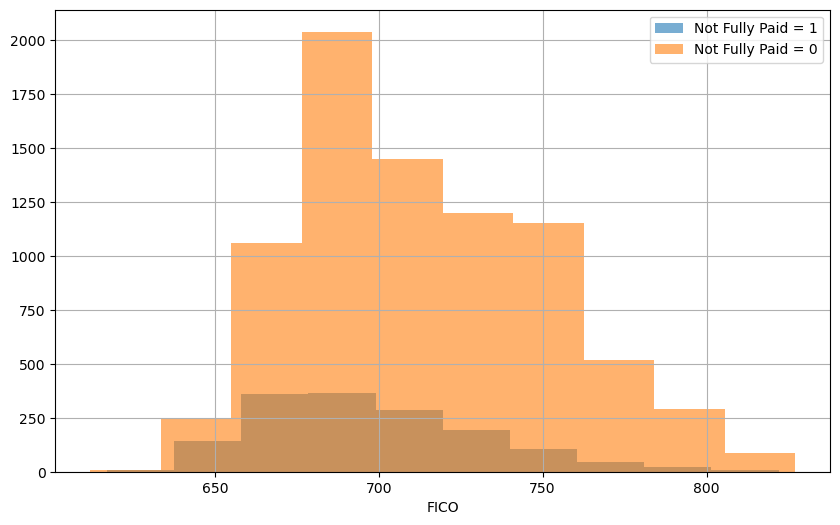

In [10]:
   # Create a histogram on Not fully paid & Fico.
plt.figure(figsize=(10,6))
loan[loan['not.fully.paid']==1]['fico'].hist(label='Not Fully Paid = 1',alpha=0.6)
loan[loan['not.fully.paid']==0]['fico'].hist(label='Not Fully Paid = 0',alpha=0.6)
plt.legend()
plt.xlabel("FICO")

<AxesSubplot:xlabel='purpose', ylabel='count'>

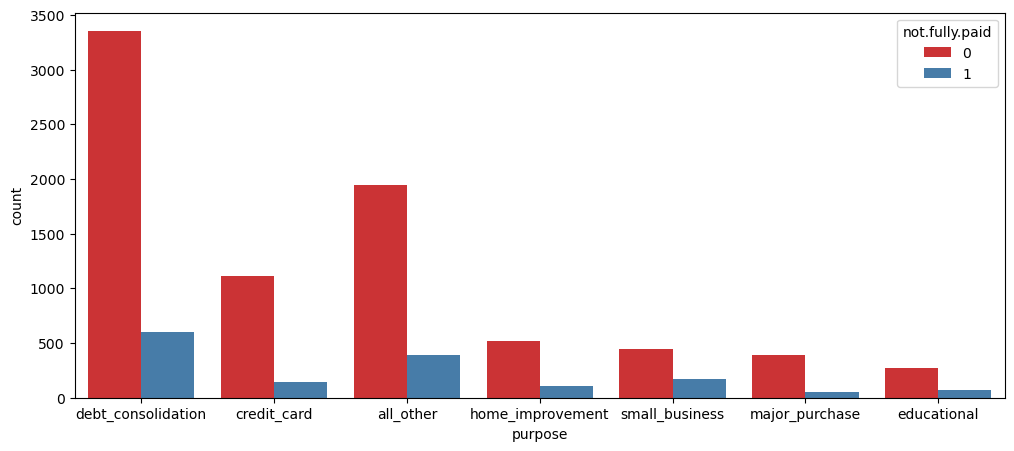

In [17]:
# Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not fully paid.

plt.figure(figsize=(12,5))
sns.countplot(x='purpose',hue='not.fully.paid',data=loan,palette='Set1')

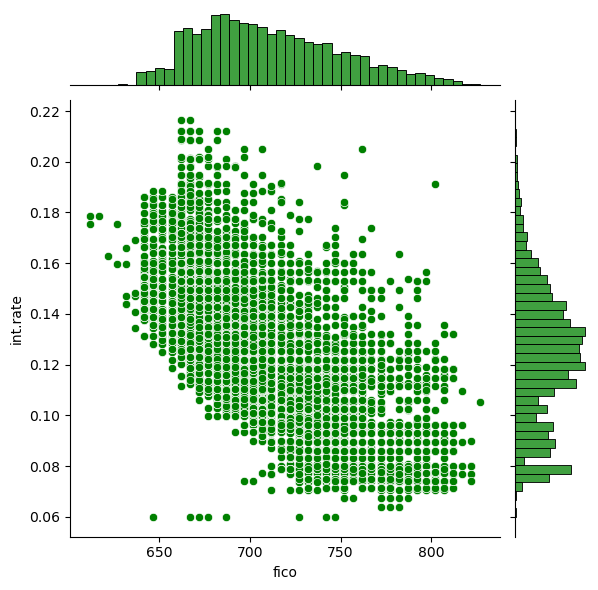

In [18]:
# Lets see trend between FICO score & Interest rate.

sns.jointplot(x='fico', y='int.rate',data=loan,color='green')   # As Fico score increases = Lower Intrest rate.

<Figure size 1100x700 with 0 Axes>

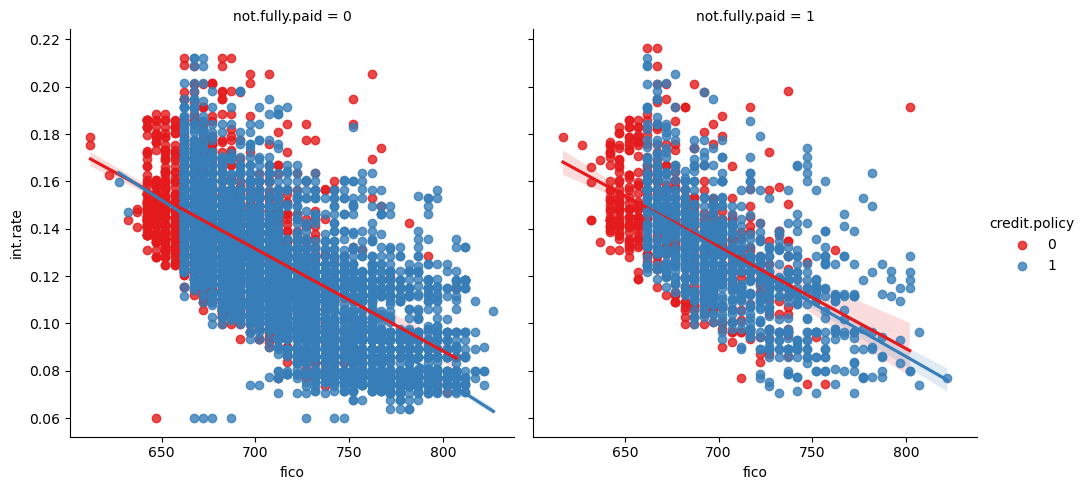

In [19]:
# Does the trend differ between Not.Fully.Paid & Credit.Policy?

plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loan,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [20]:
# Model Development.

loan.head()   # Our Purpose column consists of strings, lets use dummy variables to chenge that for our ML model.

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [21]:
   # Categorical Ft = Dummy variables.
    
cat = ['purpose']

In [23]:
final_cat = pd.get_dummies(loan,columns=cat,drop_first=True)
final_cat.info() # Now we have new additional columns based on purpose.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [26]:
   # Train Test Split.

from sklearn.model_selection import train_test_split
X = final_cat.drop('not.fully.paid',axis=1)
y = final_cat['not.fully.paid']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [27]:
   # Train the model.
    
from sklearn.tree import DecisionTreeClassifier  
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
   # Predictions & Evaluations.
    
predictions = dtree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1623
           1       0.19      0.24      0.21       293

    accuracy                           0.73      1916
   macro avg       0.52      0.53      0.52      1916
weighted avg       0.75      0.73      0.74      1916



In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[1325,  298],
       [ 223,   70]], dtype=int64)

In [32]:
   # Lets check the Random Forest model.

from sklearn.ensemble import RandomForestClassifier   

In [33]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [34]:
rfc_pred = rfc.predict(X_test)

In [35]:
   # Predictions & Evaluations on Random Forests.
    
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.54      0.02      0.05       293

    accuracy                           0.85      1916
   macro avg       0.69      0.51      0.48      1916
weighted avg       0.80      0.85      0.78      1916



In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rfc_pred)

array([[1617,    6],
       [ 286,    7]], dtype=int64)

In [ ]:
# Wich model perfomed better?D Tree or R Forest?

   # Overall R Forest did well.